## Introducción

Entrenamiento de modelo preentrenado para resolver el problema de predecir el ángulo del auto en base a la imagen.

Fuertemente basado en:
- https://towardsdatascience.com/a-practical-example-in-transfer-learning-with-pytorch-846bb835f2db
- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html 

## Imports

In [1]:
import torch
import dataset_modules.image_preloader as image_preloader
import main
import importlib
import dataset_modules.preloaded_one_part_dataset as popd
import torchvision.transforms as transforms

importlib.reload(main)
importlib.reload(popd)

<module 'dataset_modules.preloaded_one_part_dataset' from '/clusteruy/home/franco.cuevas/tesis-jupyters-2/dataset_modules/preloaded_one_part_dataset.py'>

## Variables

In [2]:
FEATURE_EXTRACTION = False

device_string = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_string)

if device_string == "cuda":
    print("Usando GPU!")

Usando GPU!


In [3]:
# preload images
preloaded_images = image_preloader.preload_images(
        images_folder='./dataset_modules/imgs/', 
        state_file='./dataset_modules/state.json', 
        resize_to=224
)

Started to preload images...
Image preloading complete in 6m 39s
The preloaded images use 0.140716552734375MB of memory


LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: guardabarro_delantero_sano, #2346, 83.70%
Class: guardabarro_delantero_roto, #457, 16.30%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: guardabarro_delantero_sano, #554, 80.17%
Class: guardabarro_delantero_roto, #137, 19.83%
#TRAIN 2803 #TEST 691
Epoch 0/99
----------
train Loss: 0.4431 Main metric (macro_f1): 0.4573 Time: 48.87s
test Loss: 0.4800 Main metric (macro_f1): 0.4450 Time: 4.00s
Epoch 1/99
----------
train Loss: 0.4206 Main metric (macro_f1): 0.4556 Time: 41.99s
test Loss: 0.4618 Main metric (macro_f1): 0.4450 Time: 3.97s
ES Module Best: 0.46184722861401767, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.4021 Main metric (macro_f1): 0.4556 Time: 41.98s
test Loss: 0.4734 Main metric (macro_f1): 0.4450 Time: 3.98s
ES Module Best: 0.46184722861401767, BadEpochs: 1
Epoch 3/99
----------
train Loss: 0.3860 Main metric (macro_f1): 0.4669 Time: 41.95s
test Loss: 0.4529 Main metric (macro_f1): 0.4601 Time: 3.97s
ES Module Best: 0.

,class,precision,recall,f1
0,guardabarro_delantero_roto,0.705882,0.350365,0.468293
1,guardabarro_delantero_sano,0.857143,0.963899,0.907392


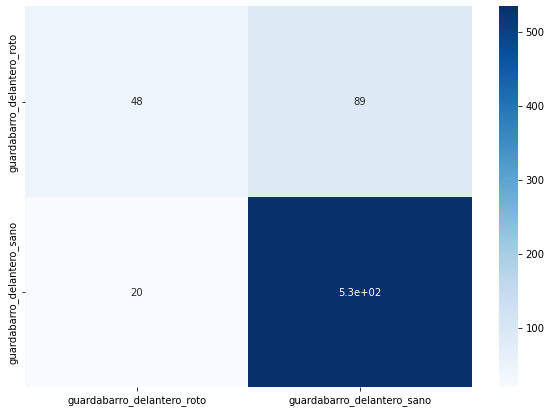

In [4]:
import importlib
importlib.reload(main)

part = "Guardabarro Delantero"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "guardabarro_delantero_use-selected-parts_resnet152"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True
)

In [5]:
import importlib
importlib.reload(main)

<module 'main' from '/clusteruy/home/franco.cuevas/tesis-jupyters-2/main.py'>

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: guardabarro_delantero_sano, #2346, 83.70%
Class: guardabarro_delantero_roto, #457, 16.30%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: guardabarro_delantero_sano, #554, 80.17%
Class: guardabarro_delantero_roto, #137, 19.83%
#TRAIN 2803 #TEST 691
Epoch 0/99
----------
train Loss: 0.4572 Main metric (macro_f1): 0.4553 Time: 16.56s
test Loss: 0.5042 Main metric (macro_f1): 0.4450 Time: 4.02s
Epoch 1/99
----------
train Loss: 0.4437 Main metric (macro_f1): 0.4556 Time: 15.96s
test Loss: 0.4978 Main metric (macro_f1): 0.4450 Time: 3.85s
ES Module Best: 0.4978494931405947, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.4332 Main metric (macro_f1): 0.4556 Time: 15.91s
test Loss: 0.5018 Main metric (macro_f1): 0.4450 Time: 3.82s
ES Module Best: 0.4978494931405947, BadEpochs: 1
Epoch 3/99
----------
train Loss: 0.4260 Main metric (macro_f1): 0.4556 Time: 15.86s
test Loss: 0.4905 Main metric (macro_f1): 0.4450 Time: 3.84s
ES Module Best: 0.49

,class,precision,recall,f1
0,guardabarro_delantero_roto,1.000000,0.080292,0.148649
1,guardabarro_delantero_sano,0.814706,1.000000,0.897893


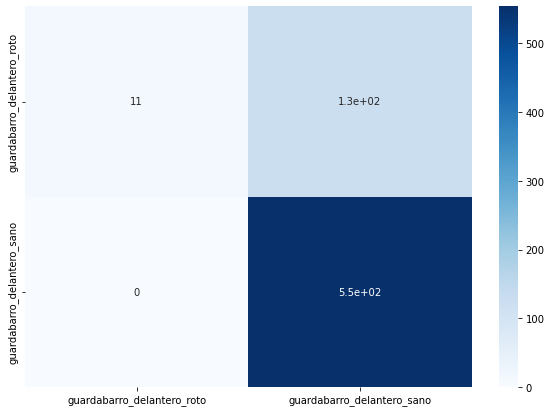

In [5]:
part = "Guardabarro Delantero"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "guardabarro_delantero_use-selected-parts_resnet152_fe"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=True,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True
)

In [7]:
import torchvision.models as models
m = models.googlenet(pretrained=True)
m

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: guardabarro_delantero_sano, #2346, 83.70%
Class: guardabarro_delantero_roto, #457, 16.30%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: guardabarro_delantero_sano, #554, 80.17%
Class: guardabarro_delantero_roto, #137, 19.83%
#TRAIN 2803 #TEST 691
Epoch 0/99
----------
train Loss: 0.4707 Main metric (macro_f1): 0.4555 Time: 13.15s
test Loss: 0.5106 Main metric (macro_f1): 0.4450 Time: 1.60s
Epoch 1/99
----------
train Loss: 0.4409 Main metric (macro_f1): 0.4556 Time: 11.91s
test Loss: 0.4933 Main metric (macro_f1): 0.4450 Time: 1.58s
ES Module Best: 0.49328299280789756, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.4354 Main metric (macro_f1): 0.4556 Time: 11.82s
test Loss: 0.4856 Main metric (macro_f1): 0.4450 Time: 1.58s
ES Module Best: 0.4855538572355911, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.4249 Main metric (macro_f1): 0.4556 Time: 11.82s
test Loss: 0.4949 Main metric (macro_f1): 0.4450 Time: 1.60s
ES Module Best: 0.4

,class,precision,recall,f1
0,guardabarro_delantero_roto,0.744186,0.233577,0.355556
1,guardabarro_delantero_sano,0.837963,0.980144,0.903494


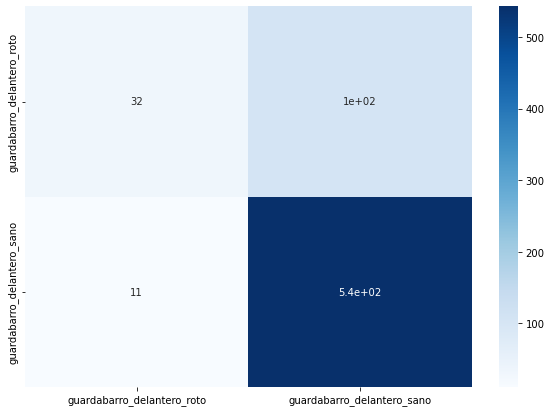

In [8]:
importlib.reload(main)
part = "Guardabarro Delantero"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "guardabarro_delantero_use-selected-parts_googlenet"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True
)

In [11]:
models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /clusteruy/home/franco.cuevas/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

LOAD TRAIN
ERROR! Session/line number was not unique in database. History logging moved to new session 293
----- CLASS DISTRIBUTION -----
Class: guardabarro_delantero_sano, #2346, 83.70%
Class: guardabarro_delantero_roto, #457, 16.30%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: guardabarro_delantero_sano, #554, 80.17%
Class: guardabarro_delantero_roto, #137, 19.83%
#TRAIN 2803 #TEST 691
Epoch 0/99
----------
train Loss: 0.4530 Main metric (macro_f1): 0.4618 Time: 28.90s
test Loss: 0.4722 Main metric (macro_f1): 0.4526 Time: 2.96s
Epoch 1/99
----------
train Loss: 0.4200 Main metric (macro_f1): 0.4764 Time: 28.05s
test Loss: 0.4580 Main metric (macro_f1): 0.4990 Time: 2.95s
ES Module Best: 0.45797854666254456, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.3971 Main metric (macro_f1): 0.5171 Time: 28.10s
test Loss: 0.4469 Main metric (macro_f1): 0.5148 Time: 2.97s
ES Module Best: 0.4469056067780717, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.3780 Main metric (macro_f1): 0.56

,class,precision,recall,f1
0,guardabarro_delantero_roto,0.607143,0.248175,0.352332
1,guardabarro_delantero_sano,0.837795,0.960289,0.894870


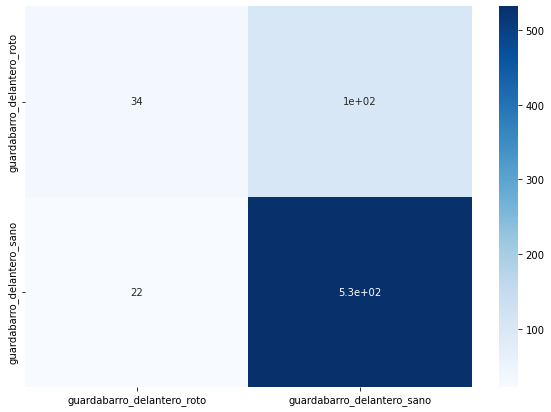

In [9]:
importlib.reload(main)
part = "Guardabarro Delantero"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "guardabarro_delantero_use-selected-parts_vgg16"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True
)